# Berechnung zur Ermittlung des Wärmestroms von Widerständen in Umgebung

### Rahmenbedingungen: 

1A UsB + 1A Display + 1A Horn + 1A Backlight + 1A Highbeam + 1A LowBeam = 6A 

Pnenn= 5*12V +1*5V= 65W

Anzahl der Belasteten Widerstände: 6x Arcol HS50

Last Pro Widerstand: 12W


## Fragstellungen
Temperatureerhöhung der Widerstandsoberfläche mit geeignetem Kühlkörper: 38 Grad (sh. Abbildung)

Bedingung für geeignetem Kühlkörper: Wärmedurchgangsleistung> Pnenn elektrisch

Fragestellungen: 

Wie groß ist die Wärmeleitung zwischen Widerstandsschraubplatte und Grundplatte? (Leitfähigkeit Alu)

Wie groß ist der Wärmeübergang Grundplatte zu Luft?

Welche Strömungsart herscht? 

Wie hoch ist der Anteil der Strahlung? 

Wie lange kann der Prüfstand bei Volllast verwendet werden?

## Annahme
Berechnung des Wärmedurchgangs bei gegebener Differenztemperatur. Mit werkseitigem Kühler erhitzt sich die Widerstandsoberfläche um 38 Grad. Wenn Wärmedurchgangsleistung bei dT= 38°Grad größer ist als elektrische Leistung, dann ist Kühlkörper ausreichend dimensioniert.

In [85]:
#import der nötigen Libraries
import matplotlib.pyplot as plt
from math import *
import numpy as np
from IPython import display
from sympy import *
import scipy.constants as const

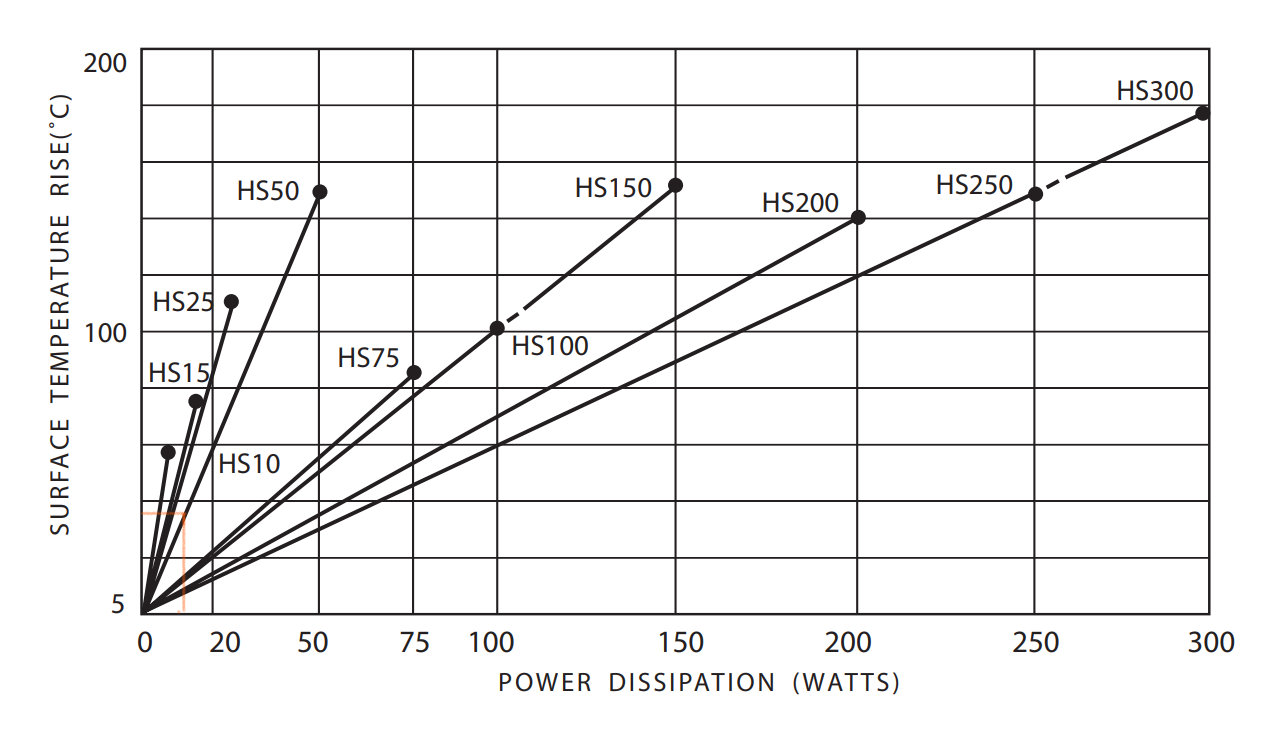

In [50]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/TemperatureRise_ArcolHS50.png")

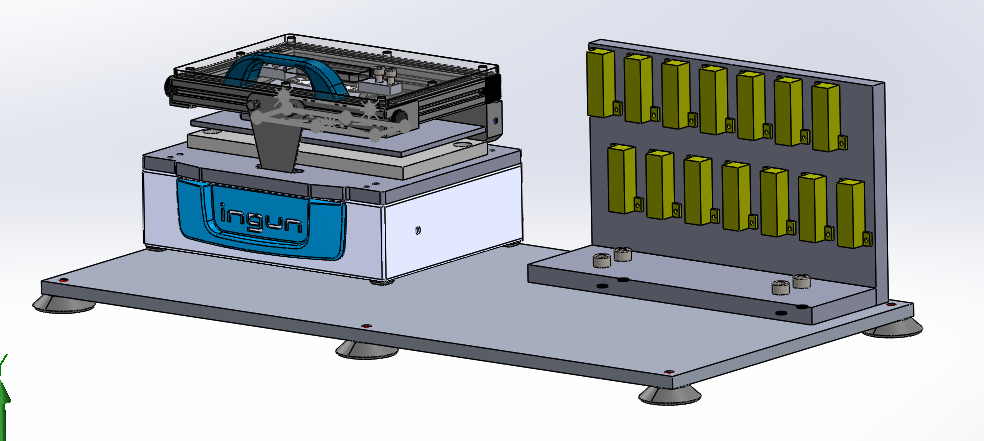

In [54]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Anordnung_Widerst%C3%A4nde.png")


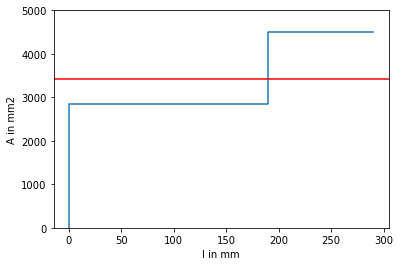

In [78]:
#Ermittlung der mittleren Querschnitte der Wärmeleitung

A=[0,2850, 2850, 2850, 4500, 4500]

l_v= [0,0, 140, 190, 190, 290]
plt.plot(l_v,A)
plt.xlabel('l in mm')
plt.ylabel('A in mm2')
plt.ylim([0, 5000])

plt.axhline(y=3418, color='r', linestyle='-')



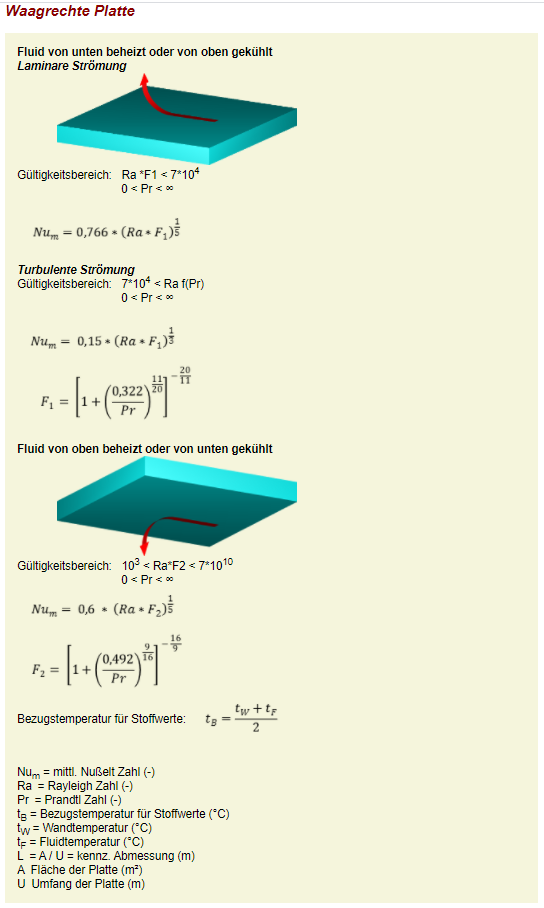

In [55]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Anstr%C3%B6mung_waagerechtePlatte.png") 

In [122]:
# Fluid von unten beheizt


L= 0.6 # [m]Länge der Bodenplatte
g= 9.81 # [m/s2]
v_l= 153*pow(10,-7) # [m2/s] D2.2 Tabelle 1
cp= 1.007#[kJ/kg*K] von Luft @ 25°C
dt= 65 # Differenztemperatur in [°C]
beta= 0.003674 # VDI Wärmeatlas, D2.2 Tabelle 10
yps= (3/2) * beta #beta & yps sind Ausehnungskoeffizienten
#a= 223.2 *pow(10,-7) # Temperaturleitzahl in [m2/s] VDI D2.2 Tabelle 15
lambda_klein= 135 # Wärmeleitfähigkeit Aluminium [W/m*K] 

#Prandtlzahl
Pr= 0.7081 # VDI D2.2  Tabelle 1 
#Grashofzahl
Gr= (pow(L,3)* 9.81* dt * (yps))/pow(v_l,2)
#Rayleighzahl
Ra= Gr*Pr

#F1 koeffizient
F1_zw = 1+pow((0.322/Pr),11/20)
F1= pow(F1_zw, -20/11) 
 
#Wärmeleitfähigkeit Luft
lambda_l= 0.026 #W/mK VDI Wärmeatlas, D2.2 Tabelle 12
print(Gr,'Gr=')
print(Ra, 'Ra')

if F1*Ra<(7*pow(10,-7)):
    print('Strömung laminar - Nusseltkorrelation fürlaminare Strömung wählen')
else:
    print('Strömung turbulent - Nusseltkorrelation für Turbulente Strömung wählen ')
    Nu= 0.15 *pow(Ra*F1,1/3)

#Wärmeübergangskoeffizient
alpha= (Nu*lambda_l)/L #Wärmeübergangskoeffizient bestimmt
print('alpha=',alpha) #Tabellenwert/Näherungswert= 5.6

#Bestimmung des Wärmedurchlasswiderstand des Aluminiums
lambda_groß= lambda_klein/l 


#kw= 1/((1/lambda_groß + 1/ alpha))
#print('kw=', kw)
#Qw= kw*3419*pow(10,-6)*18
Aw= 0.1 # Widerstandsoberfläche
A1= 3419* pow(10,-6) # Querschnittsfläche Wärmeleitung
A2= 0.18 *2 + Aw  # Oberfläche freie Konvektion

dt1=18
Qw= 1/((1/(lambda_groß*A1)+(1/(alpha*A2)))) * dt
print('Qw=', Qw, '[W]')


3242527474.048443 Gr=
2296033704.373702 Ra
Strömung turbulent - Nusseltkorrelation für Turbulente Strömung wählen 
alpha= 6.334379241497668
Qw= 66.90753667085949 [W]


## Berechnung Wärmekapazität

In [123]:
m_g= (600*300*10+ 290*150*16 +70*290*15)*(2.7*pow(10, -6)) # Masse der Wärmeleiter in kg
print('Masse=', m_g, '[kg]')

Masse= 7.56135 [kg]


In [124]:
#Berechnung der Wärmekapazität der Leiter
c=880 # J/kg*K
Qc= (m_g*20*c)/3600 #[Wh]
print('Qc=',Qc, '[Wh]')



Qc= 36.9666 [Wh]


# Strahlungsanteil

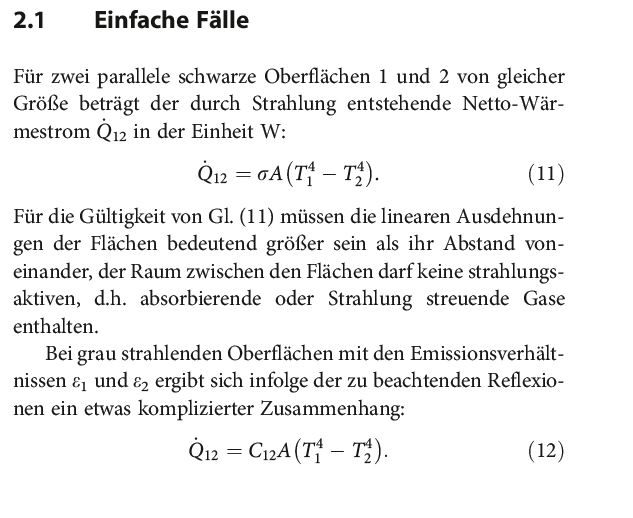

In [125]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/F_12_Strahlung.png")
#print('Emmissionsgrad von Aluminium')

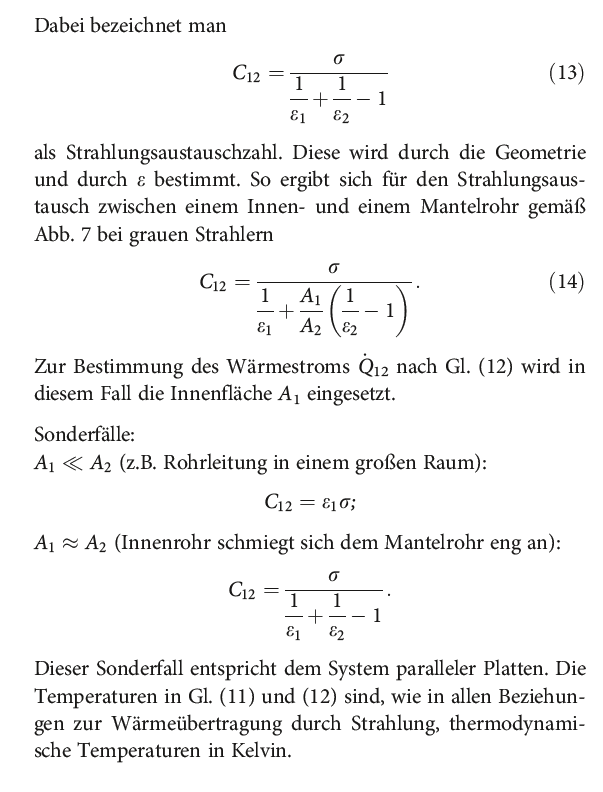

In [126]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/F_13_%20Faktor_Strahlung.png")

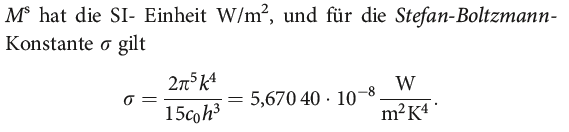

In [127]:
display.Image("https://raw.githubusercontent.com/flauhoff/Jupyter_test/main/Stefan_boltzmannkonst.png")

In [128]:
sigma= const.Stefan_Boltzmann #aus scipy library
eps= 0.049 # VDI Wärmeatlas K1 Tabelle 2, Aluminum Walzblank
C12= 0.049*sigma #[W/m4*K4] , elxiertes Alu= 0.7
A= 0.6*0.3*2+0.3*0.2 #[m2]

Qpunkt_s= C12*A*pow(dt,4) #[W]
print('Wärmestrom der Strahlung: Qpunkt=',Qpunkt, '[W]')
print('Strahlungsanteil sehr gering, temperatur in der vierten Potenz und Emmissionsgrad von glatten Aluminium sehr klein')
print(sigma)

#Heizkörper
#A1= 0.6*2*0.1*2
#A2=9
#C12= roh/(1/0.9 + 0.5)
#C12= 0.925*5.67040*pow(10,-8)
#Qpunkt= C12*A*pow(60,4)
#print('Wärmestrom der Strahlung: Qpunkt=',Qpunkt, '[W]')

Wärmestrom der Strahlung: Qpunkt= 1.86714088868832 [W]
Strahlungsanteil sehr gering, temperatur in der vierten Potenz und Emmissionsgrad von glatten Aluminium sehr klein
5.670374419e-08


### Gesamtwärmestrom

In [129]:
Qges= Qpunkt_s+ Qw
print('Gesamtwärmestrom=', Qges, '[W]')

Gesamtwärmestrom= 66.92836769075082 [W]


## Fazit
Der Prüfstand soll mit einer elektrischen von 65W ohne Nennenswerte Erwärmung des Gehäuses betrieben werden können.

Die Wärmeleistung ist bei Differenztemperatur 38° kleiner als die elektrische Leistung. Dadurch kann die Widerstandstemperatur nicht auf vorgesehenem Level gehalten werden. 
Die hohe Wärmekapazität der Aluminiumplatten von 36Wh arbeitet als zeitliches Verzögerungsglied. Nach erreichen der Differenztemperatur nach circa 25min, erreicht die Widerstandsoberfläächentemperatur ein höheres Temperaturlevel. Dadurch erhöht sicher der Wärmestrom durch Konvektion und Strahlung erheblich.
Bei einer dauerhaften Verwendung wird sich das Temperaturlevel auf Differenztemperatur ~ 65°C einpendeln, was durch eine Messung überprüft werden muss. 

Im regulären Prüfstandsbetrieb ist die Nennlastbelastung von 65W über Zeiträume über 20 Minuten nicht vorgesehen, da sich stationäre Temperaturzustände im Steuergerät schon nach einigen Minuten einstellen. 

Heißt, der Kühlkörper ist bei Belastungen im regülären Betrieb ohne Nennenswerte Erwärmung des Gehäuses möglich. Messabweichung der Volt/Ammeter bei längeren Belastungen sind hinzunehmen bzw. können durch anschließen von externen Messgeräten verhindert werden. 

Ein sicherer Betrieb der Widerstände ist bis zu 200°C zugelassen. 
